## Predicting Health Insurance Charges with Machine Learning

### Health Insurance Policies

When you have a health insurance policy it covers or minimizes the expenses you will pay for health care services. A variety of factors influence the cost of an insurance policy. These include the following:

1. Age — Premiums can be up to 3 times higher for older people than for younger ones.

2. Location — Where you live has an effect on your premiums. Differences in competition, state and local rules and cost of living make a difference.

3. Tobacco Use — Insurers can charge tobacco users up to 50% more than those who don’t use tobacco.

4. Individual vs Family — Insurers can charge more for a plan that also covers a spouse and/or dependents.

5. Plan Category — There are five plan categories including Bronze, Silver, Gold, Platinum, and Catastrophic. The categories are based on how you and the plan share costs. Bronze plans usually have lower monthly premiums and higher out-of-pocket costs when you get care. Platinum plans usually have the highest premiums and lowest out-of-pocket costs.

According to the Kaiser Family Foundation, in 2020 the average annual cost of health insurance in the United States is $7,470 for an individual and $21,342 for a family.



### Health Insurance Claims

A health insurance claim is a request made for direct payment or reimbursement for medical services that an insured person has obtained. Health insurance benefits or payments are obtained after the insured or health care provider submits a claim to their insurer.

Change Healthcare found there were `$3 trillion dollars of medical insurance claims submitted by hospitals in the United States in 2016. $262 billion of those charges were initially denied.`

### Predicting Health Care Expenses

Models for accurately predicting individual health care expenses would be very beneficial to insurance companies, health care providers, and those insured under an insurance policy. Accurate cost estimates can help health insurers and health care providers plan for the future and prioritize the allocation of healthcare resources. In addition, the insured can know in advance what their probable expenses will be in the future and can assist them in selecting insurance plans with appropriate deductibles and premiums.

The objective of this project is to accurately predict insurance costs based on the characteristics of the policyholders. In addition, we will determine the most important variable in influencing insurance costs. These estimates can be used by health insurers to set the price of yearly premiums higher or lower depending on the expected treatment costs.

The following steps will be performed using machine learning and Python.

1. Import the required software libraries.

2. Load and Import the dataset.

3. Data Analysis and Exploration.

4. Feature Selection.

5. Split data into training and test data sets.

6. Normalize the Data.

7. Train the model on the training data.

8. Make predictions on the test data.

9. Evaluate the model’s performance.

10. Draw conclusions from evaluations.

#### Objective: Predict medical insurance costs based on the characteristics of the policyholders.

In [3]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [4]:
# Importing the data set into a dataframe

insurance = pd.read_csv('/Users/sarju/Desktop/Projects_2023/Health_Insurance_Prediction/insurance.csv')


### Data Analysis and Exploration

In [5]:
# Printing first 5 rows of the data frame

insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


This dataset was found on Kaggle (https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=download)
The data set was based on Miri Choi’s Medical Cost Personal Datasets.

The columns and definitions are described below.

age — age of the policyholder.

sex — gender of the policy holder (female, male).

BMI — Body mass index, providing an understanding of the body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 25.

children — number of children/dependents of the policyholder.

smoker — smoking status of the policyholder (non-smoker=no, smoker=yes).

region — the residential area of the policyholder in the US (northeast, northwest, southeast, and southwest).

charges — individual medical costs billed by health insurance (US Dollars).

In [7]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Summary:

- There are 1,338 insurance records with 7 variables.

- The data set does not have any null or missing values.

- There are categorical and numerical data types.

In [8]:
# Show statistics on the data frame.

insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Observations:

- The average age is 39 years.

- The average body mass index is 30.66.

- The average number of children is 1.

- The average claims charge was $13,270.

### Visualize the relationship between age and claim charges

Text(0, 0.5, 'Claim Charges ($)')

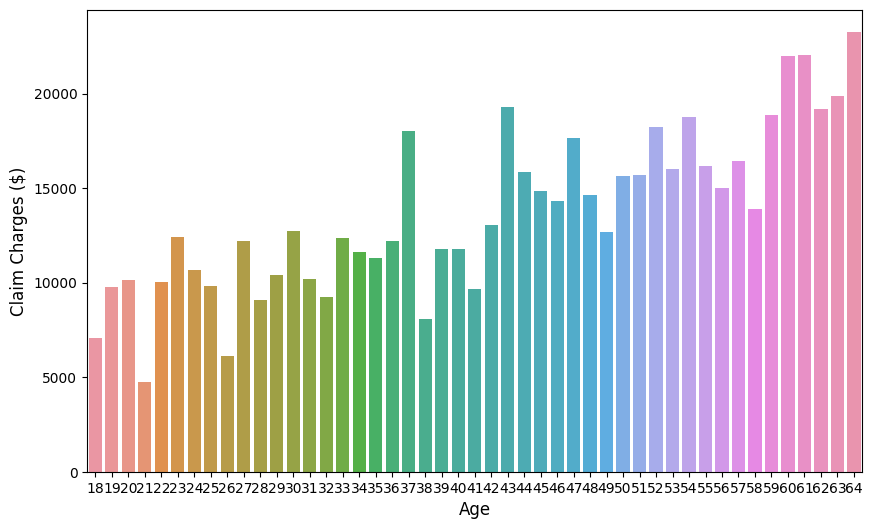

In [9]:
fig = plt.figure(figsize = (10, 6))
sns.barplot(y = 'charges', 
            x = 'age', 
            data = insurance,
            ci = None)

# set labels
plt.xlabel("Age", size=12)
plt.ylabel("Claim Charges ($)", size=12)

### Visualize the relationship between gender and claim charges

Text(0, 0.5, 'Claim Charges ($)')

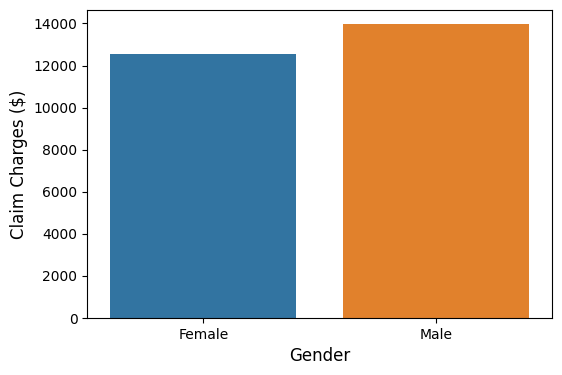

In [10]:
fig = plt.figure(figsize = (6,4))
sns.barplot(y = 'charges', 
            x = 'sex', 
            data = insurance,
            ci = None)
plt.xticks(ticks=[0, 1], labels = ["Female", "Male"])

# set labels
plt.xlabel("Gender", size=12)
plt.ylabel("Claim Charges ($)", size=12)

### Check the body mass index (BMI) column for variances in the values

In [11]:
min(insurance.bmi), max(insurance.bmi)
(15.96, 53.13)

(15.96, 53.13)

There is a broad range of variances in body mass index (BMI) values. In order to visualize data for this feature, we will need to add a new BMI class variable and create groups with specific BMI values.

In [12]:
insurance["bmiclass"] = insurance.bmi
insurance.bmiclass = insurance.bmi.round()
insurance.head(5)
insurance['bmiclass'] = insurance['bmiclass'].replace([16, 17, 18, 19, 20, 21], 1)
insurance['bmiclass'] = insurance['bmiclass'].replace([22, 23, 24, 25, 26, 27], 2)
insurance['bmiclass'] = insurance['bmiclass'].replace([28, 29, 30, 31, 32, 33], 3)
insurance['bmiclass'] = insurance['bmiclass'].replace([34, 35, 36, 37, 38, 39], 4)
insurance['bmiclass'] = insurance['bmiclass'].replace([40, 41, 42, 43, 44, 45], 5)
insurance['bmiclass'] = insurance['bmiclass'].replace([46, 47, 48, 49, 50, 51, 52, 53], 6)
insurance.head(5)

,age,sex,bmi,children,smoker,region,charges,bmiclass
0,19,female,27.900,0,yes,southwest,16884.92400,3.0
1,18,male,33.770,1,no,southeast,1725.55230,4.0
2,28,male,33.000,3,no,southeast,4449.46200,3.0
3,33,male,22.705,0,no,northwest,21984.47061,2.0
4,32,male,28.880,0,no,northwest,3866.85520,3.0


### Visualize the relationship between body mass index and the amount of claim charges

Text(0, 0.5, 'Claim Charges ($)')

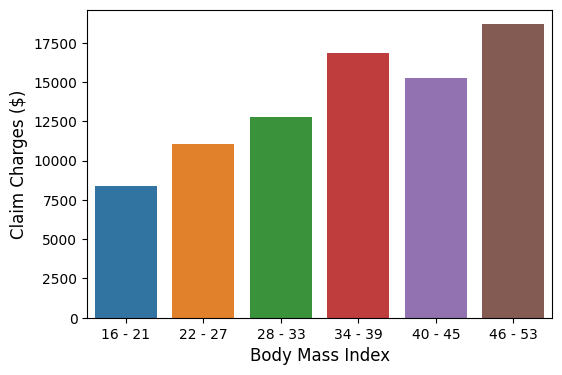

In [13]:
fig = plt.figure(figsize = (6,4))
sns.barplot(y = 'charges', 
            x = 'bmiclass', 
            data = insurance,
            ci = None)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels = ["16 - 21", "22 - 27", "28 - 33", "34 - 39", "40 - 45", "46 - 53"]) 
# set labels

plt.xlabel("Body Mass Index", size=12)
plt.ylabel("Claim Charges ($)", size=12)

### Visualize the relationship between a number of children and amount of claim charges

Text(0, 0.5, 'Claim Charges ($)')

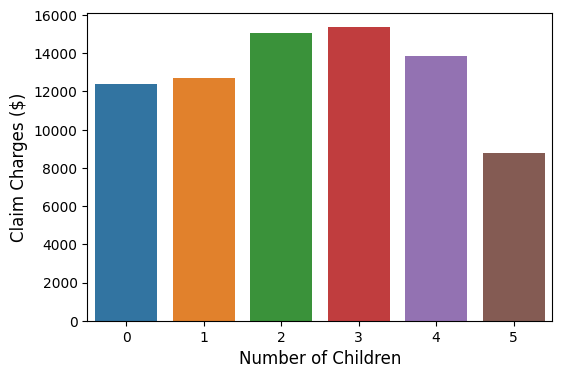

In [14]:
fig = plt.figure(figsize = (6,4))
sns.barplot(y = 'charges', 
            x = 'children', 
            data = insurance,
            ci = None)

# set labels
plt.xlabel("Number of Children", size=12)
plt.ylabel("Claim Charges ($)", size=12)

### Visualize the relationship between smoker/non-smoker and the amount of claim charges.

Text(0, 0.5, 'Claim Charges ($)')

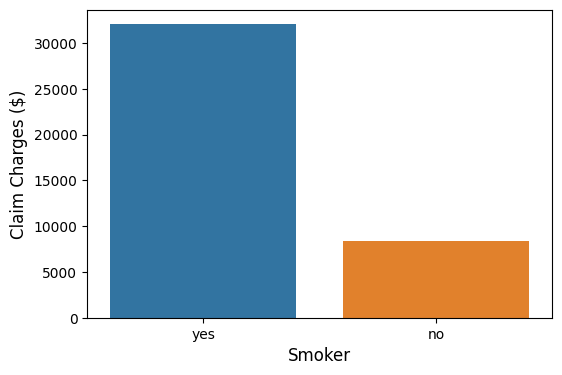

In [15]:
fig = plt.figure(figsize = (6,4))
sns.barplot(y = 'charges', 
            x = 'smoker', 
            data = insurance,
            ci = None)
 
# set labels
plt.xlabel("Smoker", size=12)
plt.ylabel("Claim Charges ($)", size=12)

### Visualize the relationship between region and amount of claim charges



Text(0, 0.5, 'Claim Charges ($)')

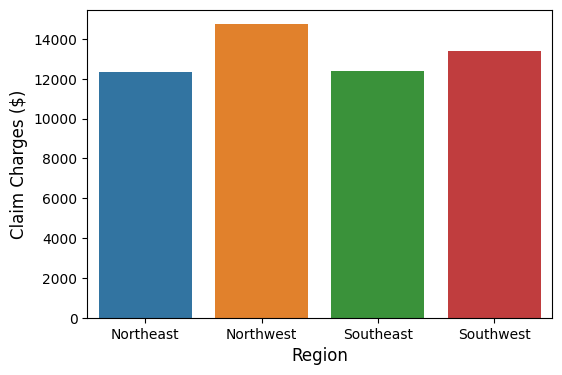

In [16]:
fig = plt.figure(figsize = (6,4))
sns.barplot(y = 'charges', 
            x = 'region', 
            data = insurance,
            ci = None)
plt.xticks(ticks=[0, 1, 2, 3], labels = ["Northeast", "Northwest", "Southeast", "Southwest"]) 

# set labels
plt.xlabel("Region", size=12)
plt.ylabel("Claim Charges ($)", size=12)

Observations:

- As age increases there is a gradual increase in claim charges.

- Claim charges are slightly higher for males.

- As body mass index increases there is an increase in claim charges. It is interesting that claim charges decrease -slightly in the 40–45 BMI group.

- Claim charges are higher when there are 2 or 3 children under the policy.

- Claim charges are significantly higher among smokers.

- Claim charges are similar across all regions with Northwest showing the highest charges.

In [17]:
# Checking the charges column for variances in the values


min(insurance.charges), max(insurance.charges)
(1121.8739, 63770.42801)

(1121.8739, 63770.42801)

There is a broad range of variances in the values for the charges variable.

### Visualize the distribution of values for claim charges

<AxesSubplot: xlabel='charges', ylabel='Count'>

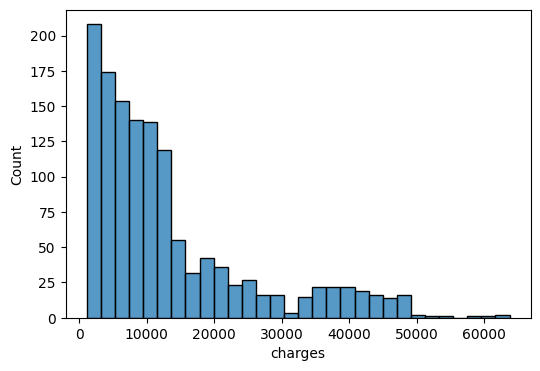

In [18]:
plt.figure(figsize=(6, 4))
sns.histplot(insurance['charges'])

The charge values are skewed to the right side of the axis. We will use min and max scaling in sklearn to normalize the charges. This will convert the values of the charges to a range between 0 and 1, which will make it easier for the data to be processed in the models.

In [19]:
column = 'charges'
insurance[column] = (insurance[column] - insurance[column].min()) / (insurance[column].max() - insurance[column].min())
insurance.head()

,age,sex,bmi,children,smoker,region,charges,bmiclass
0,19,female,27.900,0,yes,southwest,0.251611,3.0
1,18,male,33.770,1,no,southeast,0.009636,4.0
2,28,male,33.000,3,no,southeast,0.053115,3.0
3,33,male,22.705,0,no,northwest,0.333010,2.0
4,32,male,28.880,0,no,northwest,0.043816,3.0


### Feature Selection

We need to convert categorical data into numerical data. We will use the one-hot encoding for this conversion. One hot encoding is a technique where we replace the categorical data with binary digits. The converted column is given a number corresponding to the values.



In [22]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
insurance["sex"] = le.fit_transform(insurance["sex"])       # 0 = female, 1 = male
insurance["smoker"] = le.fit_transform(insurance["smoker"]) # 1 = smoker, 2 = non-smoker
insurance["region"] = le.fit_transform(insurance["region"]) # 1 = northwest, 2 = southeast, 3 = southwest, 4 = northeast


We will use the Pearson Correlation method to construct a correlation matrix that measures the linear association between features and target variables.


<AxesSubplot: >

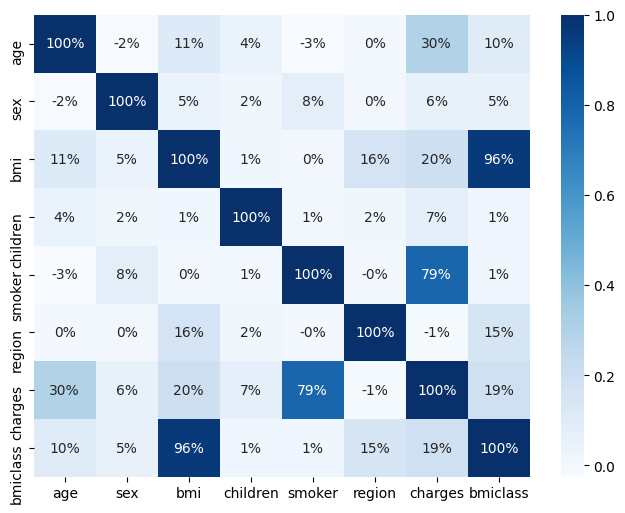

In [23]:
plt.figure(figsize=(8,6))  
sns.heatmap(insurance.corr(), annot=True, fmt='.0%', cmap='Blues')

Observations:

- There is a strong correlation between smokers and charges.
- There is a weak correlation between age and charges
- There is a weak correlation between BMI and charges.

We need to remove sex and region features because they provide minimal value for this analysis. We will also remove the BMI class feature because BMI is already represented in the data set.

In [24]:
insurance.drop(['sex', 'region', 'bmiclass'], axis=1, inplace=True)

### Split the Data into Training and Test Data Sets

First, we need to divide our data into x values (the data we will use to make predictions) and y values (the data we are attempting to predict).



In [25]:
x_data = insurance.drop('charges', axis = 1)
y_data = insurance['charges']

We will use the train_test_split function to generate training data and test data. The test data set will include 25% of the original data set.


In [26]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.25, random_state=42)



### Normalize the Data

We need to normalize the data so that its distribution will have a mean value of 0 and a standard deviation of 1. Normalization makes the features more consistent with each other, which allows the model to predict outputs more accurately. This is done for each feature or column in the data set.

In [27]:
sc = StandardScaler()
x_training_data = sc.fit_transform(x_training_data)
x_test_data = sc.fit_transform(x_test_data)

#### We will now train models, make predictions and evaluate the performance of three different machine learning models.

We will use the R2 score to evaluate the performance of the regression-based machine learning models. It is also known as the coefficient of determination. It works by measuring the amount of variance between samples in the dataset and the predictions made by the model.

We will use Root Mean Squared Error (RMSE) to measure the performance of the models. The root means the squared error is a metric that shows the average distance between the predicted values from the model and the actual values in the dataset. RMSE is found by calculating the residual (difference between prediction and truth) for each data point, computing the norm of residuals for each data point, computing the mean of residuals and taking the square root of that mean. The lower the value, the better the model performs.

### Linear Regression Model

Simple linear regression uses one independent variable to explain or predict the outcome of the dependent variable Y, while multiple linear regression uses two or more independent variables to predict the outcome. When creating a regression model, all that we are trying to do is draw a line that is closest to each point in a data set.



In [44]:
# We will train the linear regression model on the training data and make predictions on the test data

# Create model object. 
lr = LinearRegression()
# Train the model on the training data.
lr.fit(x_training_data, y_training_data)
# Make predictions on the test data. 
predictions_lr = lr.predict(x_test_data)

#### Calculate the R2 score for the linear regression model using the test data

In [73]:
from sklearn.metrics import r2_score

lr_r2 = r2_score(y_test_data, predictions_lr)
print("R2 score :", lr_r2)

R2 score : 0.7656830523004188


R2 Score: 0.7656830523004188

#### The linear regression model accurately predicted 77% of the insurance claim charges based on the features of the policyholder.



Calculating the root mean squared error (RMSE) for the linear regression model.

In [46]:
rmse = np.sqrt(np.mean(((predictions_lr - y_test_data)**2)))
print(rmse)

0.09491233719646869


#### The RMSE shows that the linear regression model has a typical prediction error of .09, which is very good.

### Random Forrest Model

Random Forrest Model consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest generates a class prediction and the class with the most votes becomes the model’s prediction. The fundamental idea behind a random forest is to combine many decision trees into a single model. Individually, predictions made by decision trees (or humans) may not be accurate but combined together, the predictions will be far more accurate.

In [48]:
# We will train the random forest model on the training data and make predictions on the test data.

# Create model object. 
rf = RandomForestRegressor(n_estimators = 10, random_state = 0)
# Train the model on the training data.
rf.fit(x_training_data, y_training_data)
# Make predictions on the test data. 
predictions_rf = rf.predict(x_test_data)


Calculating the R2 score for the random forest model using the test data

In [76]:
# Calculate the R2 score.
rf_r2 = r2_score(y_test_data, predictions_rf)
print("R2 Score :", rf_r2)

R2 Score : 0.8230230541174343


R2 Score: 0.8230230541174343

#### The random forest model accurately predicted 82% of the insurance claim charges based on the features of the policyholder.

Calculating the root mean squared error (RMSE) for the random forest model

In [52]:
rmse = np.sqrt(np.mean(((predictions_rf - y_test_data)**2)))
print(rmse)

0.08248579515212683


#### The RMSE shows that the random forest model has a typical prediction error of .08, which is very good.

### Support Vector Machine Model

Support Vector Machines (SVM) are supervised machine learning models with associated learning algorithms that analyze data and recognize patterns. Support vector machines can be used for both classification problems and regression problems. More specifically, an SVR model maps the data points as points in space and divides the separate categories so that they are divided by an open gap that is as wide as possible. New data points are predicted to belong to a category based on which side of the gap they fall into.



In [53]:
# We will train the support vector machine model on the training data and make predictions on the test data.

# Create model object. 
sv = SVR()
# Train the model on the training data.
sv.fit(x_training_data, y_training_data)
# Make predictions on the test data. 
predictions_sv = sv.predict(x_test_data)

Calculate the R2 score for the support vector machine model using the test data

In [75]:
sv_r2 = r2_score(y_test_data, predictions_sv)
print("R2 Score :", sv_r2)

R2 Score : 0.7393644729282558


R2 Score: 0.7395439745290365

#### The support vector machine model accurately predicted 74% of the insurance claim charges based on the features of the policyholder.

Calculating the root mean squared error (RMSE) for the support vector machine model

In [55]:
rmse = np.sqrt(np.mean(((predictions_sv - y_test_data)**2)))
print(rmse)

0.10010081746903923


#### The RMSE shows that the support vector machine model has a typical prediction error of .10, which is very good.

In [77]:
# Printing the accuracy scores for each of the models

from sklearn.metrics import accuracy_score

models = pd.DataFrame({
    'Model':['Linear Regression', 'Random Forrest', 'Support Vector Machine'],
    'Accuracy_score' :[lr_r2, rf_r2, sv_r2]
})
models

# sns.barplot(x='Accuracy_score', y='Model', data=models)

# models.sort_values(by='Accuracy_score', ascending=False)

,Model,Accuracy_score
0,Linear Regression,0.765683
1,Random Forrest,0.823023
2,Support Vector Machine,0.739364


<AxesSubplot: xlabel='Accuracy_score', ylabel='Model'>

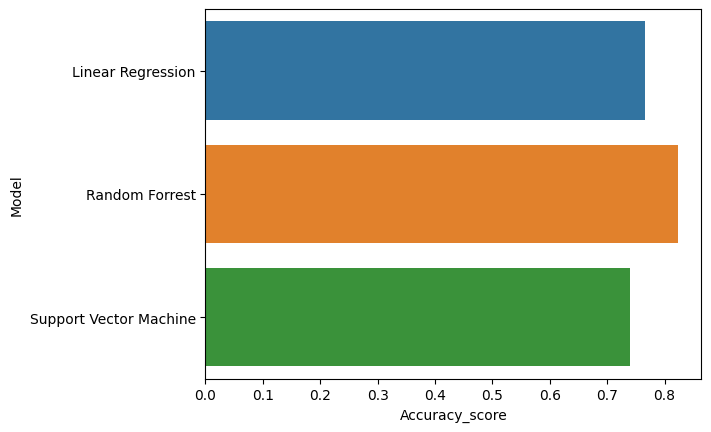

In [78]:
sns.barplot(x='Accuracy_score', y='Model', data=models)

Conclusions: 

All of the models did a good job in predicting insurance claim charges based on the characteristics of the policyholders. 
The random forest model had the highest accuracy score. This model correctly predicted 82% of insurance claim charges. This model also has a typical prediction error of .08. The study can be improved by having a larger insurance data set and by tweaking the model's hyper-parameters.